In [20]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy import init_printing
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
from matplotlib.collections import PolyCollection

init_printing()

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Đạo hàm, Đạo hàm riêng, Chain rule

### Đạo hàm

1. Định nghĩa đạo hàm
    $$ 
    f'(x)
      = \frac{df(x)}{dx} = \lim_{h\ \to 0} \frac{f(x + h) - f(x)}{h}
    $$ 
    
    - Là tỉ lệ của độ biến thiên của hàm $y$ đối với độ biến thiên của $x$ tại một điểm nhất định


2. Ý nghĩa hình học của đạo hàm

    - Là độ nghiêng của đường tiệm cận của hàm số tại một điểm nhất định 


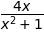

In [2]:
from sympy import symbols, diff, sin, plot

x, y = symbols('x y', real=True)
y = (4*x) / (x**2 + 1)
y

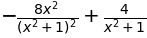

In [3]:
# find the derivative of y
dy = diff(y, x)
dy

#### Vẽ đường tiệm cận tại các điểm

Xét đường tiệm cận tại 2 điểm $ 0,0 $ và điểm $ 1,2 $

<IPython.core.display.Javascript object>


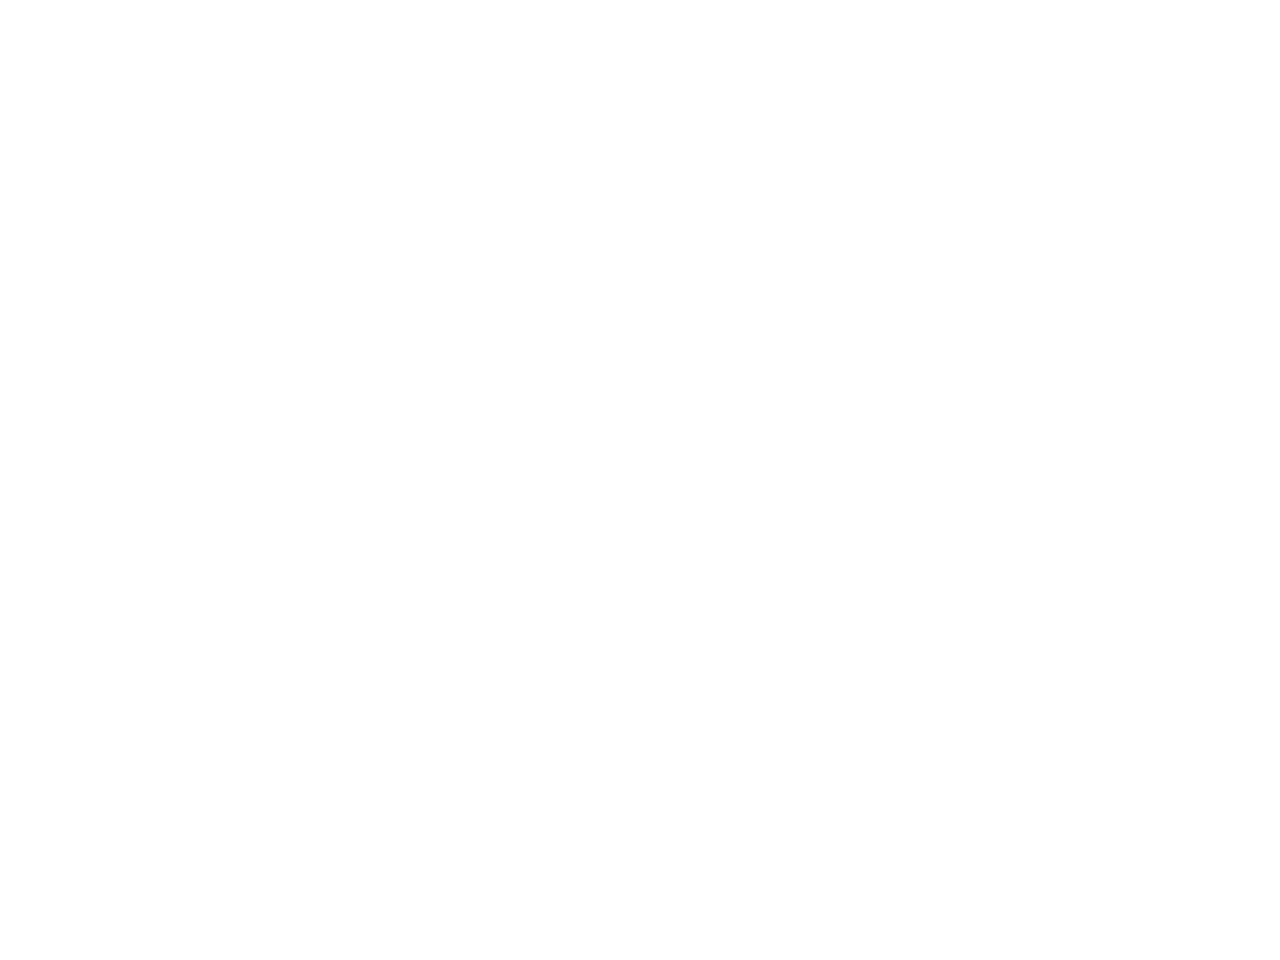

<IPython.core.display.Javascript object>


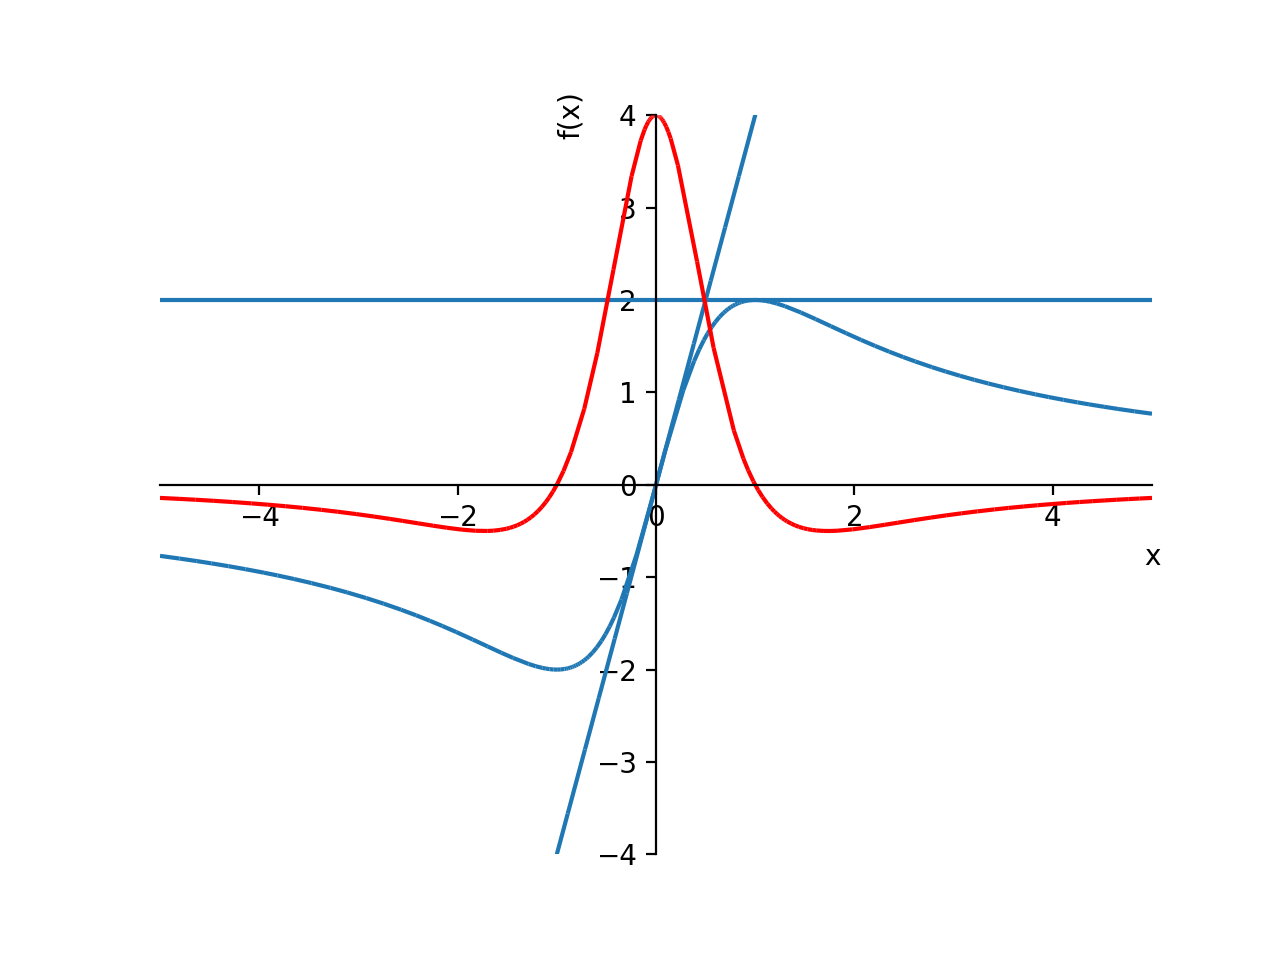

In [4]:
 # find y coordinate of x at 0
p0 = y.subs(x, 0)
 
# find slopes of the tangents
m0 = dy.subs(x, 0)
m1 = dy.subs(x, 1)

y0 = m0*x
y1 = 2
p = plot(y, y0, y1, dy, (x, -5, 5), ylim=(-4, 4))
p[3].line_color = 'red'
p.show()

#### Đạo hàm riêng phần đối với hàm có nhiều biến số

- Đạo hàm riêng theo 1 biến của một hàm số là đạo hàm theo biến đó với giả thuyết rằng các biến khác là hằng số



In [5]:
x, y = symbols('x y', real=True)
f = x ** 2 * y + sin(y)
f

In [6]:
diff(f, x)

Đối với các tài liệu về machine learning thì đạo hàm riêng thường được kí hiệu như sau 

$$ \frac{\partial f}{\partial x} = 2 x y $$

In [7]:
diff(f, y)

$$ \frac{\partial f}{\partial y} = x^{2} + \cos{\left (y \right )} $$

#### Ý nghĩa hình học của Đạo hàm riêng


<IPython.core.display.Javascript object>


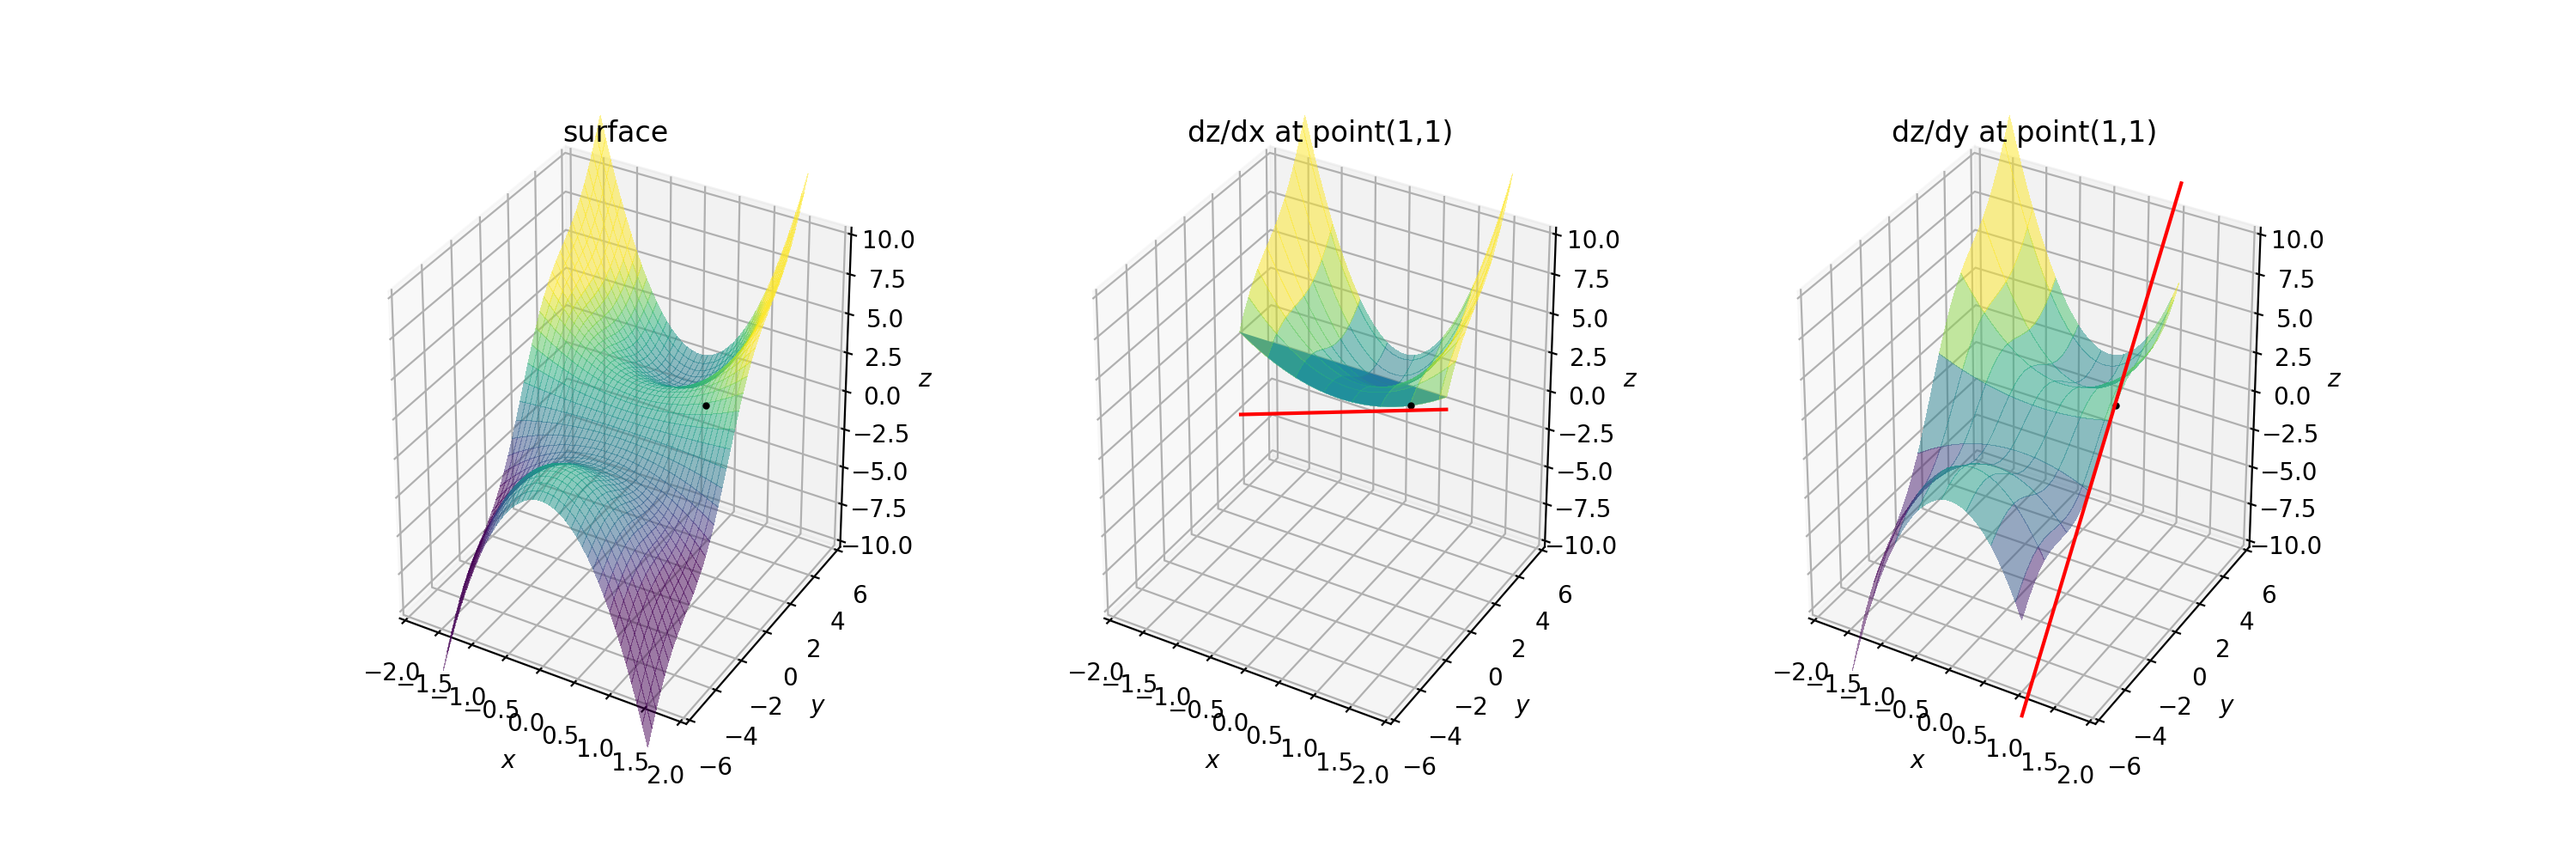

In [8]:
def title_and_label(ax, title, x_lim=2, y_lim=6, z_lim=10):
    ax.set_title(title)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    ax.set_xlim3d(-x_lim, x_lim)
    ax.set_ylim3d(-y_lim,y_lim)
    ax.set_zlim3d(-z_lim, z_lim)

cor_x, cor_y = (1., 1.)
cor_z = cor_x * cor_x * cor_y + np.sin(cor_y)


fig, axes = plt.subplots(1,3, figsize=(15,5), subplot_kw={'projection':'3d'})

x = np.linspace(-1.5, 1.5, 40)
y = np.linspace(-6, 6, 40)

X, Y = np.meshgrid(x, y)

Z = X ** 2 * Y + np.sin(Y)

norm = mpl.colors.Normalize(-5, 5)
axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.viridis, alpha=0.5)

axes[0].plot([cor_x], [cor_y], [cor_z], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=2)
title_and_label(axes[0], "surface")
# cb = fig.colorbar(p, ax=axes[0], shrink=0.6)



x2= np.linspace(-1.5, 1.5, 30)
y2 = np.linspace(1, 6, 30)
X2, Y2 = np.meshgrid(x2, y2)


Z2 = X2 ** 2 * Y2 + np.sin(Y2)


x3 = np.linspace(-1.5, 1.5, 30)
y3 = np.ones_like(x3)
d_Z_X = slope = cor_x ** 2 + np.cos(cor_y)
z3 = x3 * slope
z4 = x2 ** 2 * y3 + np.sin(y3)

verts = [list(zip(x3, z4))]


poly = PolyCollection(verts)


axes[1].plot_surface(X2, Y2, Z2, rstride=4, cstride=4, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.viridis, alpha=0.5)
axes[1].add_collection3d(poly, zs=[1], zdir='y')
axes[1].plot([cor_x], [cor_y], [cor_z], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=2)

axes[1].plot(x3, y3, z3, label='parametric curve', color='r')

title_and_label(axes[1], "dz/dx at point(1,1)")



x= np.linspace(-1.5, 1, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)

x2= np.linspace(1, 1.5, 30)
y2 = np.linspace(-6, 6, 30)
X2, Y2 = np.meshgrid(x2, y2)

Z = X ** 2 * Y + np.sin(Y)

Z2 = X2 ** 2 * Y2 + np.sin(Y2)

# y3 = np.linspace(-6, 6, 30)
# x3 = np.ones_like(y3)

y3 = np.linspace(-6, 6, 30)
x3 = np.ones_like(y3)
d_Z_X = slope = 2 * cor_x * cor_y
z3 = y3 * slope
z4 = x2 ** 2 * y3 + np.sin(y3)

verts = [list(zip(y3, z4))]


poly = PolyCollection(verts)


axes[2].plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.viridis, alpha=0.5)
axes[2].plot([cor_x], [cor_y], [cor_z], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=2)
axes[2].plot(x3, y3, z3, label='parametric curve', color='r')

title_and_label(axes[2], "dz/dy at point(1,1)")



Hai đường tiệm cận theo 2 chiều x, y tại điểm (1, 1).


Đạo hàm riêng $ \frac{\partial f}{\partial x} $ , $ \frac{\partial f}{\partial y} $ cho ta biết được độ nhạy của hàm f biến thiên phụ thuộc vào sự thay đổi của x và y

### Chain Rule (Đạo hàm của hàm hợp)

#### Hàm hợp

Hàm hợp là một thuật ngữ trong toán học, trong đó kết quả của một hàm số được dùng làm đối số cho một hàm số khác để tạo ra một hàm thứ ba. 

$$ f(x) = f_2( f_1(x))) $$

#### Đạo hàm của hàm hợp

$$
    f'(x)
      = \frac{df(x)}{dx} = \frac{d f_2}{d f_1} \frac{d f_1}{dx}
$$

- Nếu dựa vào định nghĩa Đạo hàm Là "tỉ lệ của độ biến thiên của hàm $y$ đối với độ biến thiên của $x$ tại một điểm nhất định". thì có thể biên dịch ra là tỉ lệ độ biến thiên của hàm $f_2$ đối với độ biến thiên của hàm $f_1$ , nhân tỉ lệ độ biến thiên của hàm $f_1$ đối với độ biến thiên của $x$. 

- Từ đó bằng cách điều chỉnh giá trị của $x$ ta có thể làm hàm $f$ thay đổi (với cường độ mạnh hay nhẹ)


#### Cách tính Chain Rule đối với hàm hợp đa biến

Ví dụ:

$ f(x,y,z) = (x + y) z $

Có thể được chia thành 2 hàm 

$ q=x+y $

$ f=qz $

vậy để tính đạo hàm của f đối với x

$ \frac{\partial f}{\partial x} = \frac{\partial f}{\partial q} \frac{\partial q}{\partial x} $


Ví dụ: 

```
# set some inputs
x = -2; y = 5; z = -4

# perform the forward pass
q = x + y # q becomes 3
f = q * z # f becomes -12

# perform the backward pass (backpropagation) in reverse order:
# first backprop through f = q * z
dfdz = q # df/dz = q, so gradient on z becomes 3
dfdq = z # df/dq = z, so gradient on q becomes -4
# now backprop through q = x + y
dfdx = 1.0 * dfdq # dq/dx = 1. And the multiplication here is the chain rule!
dfdy = 1.0 * dfdq # dq/dy = 1

```

![](./img/backward.png)

#### Gradient Descent

Trong Machine Learning chúng ta thường xuyên phải tìm giá trị nhỏ nhất (hoặc đôi khi là lớn nhất) của một hàm số nào đó. Ví dụ như các hàm mất mát trong hai bài Linear Regression và K-means Clustering. Nhìn chung, việc tìm global minimum của các hàm mất mát trong Machine Learning là rất phức tạp, thậm chí là bất khả thi. Thay vào đó, người ta thường cố gắng tìm các điểm local minimum, và ở một mức độ nào đó, coi đó là nghiệm cần tìm của bài toán.

Hướng tiếp cận phổ biến nhất là xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0. Gradient Descent (viết gọn là GD) và các biến thể của nó là một trong những phương pháp được dùng nhiều nhất.

![](https://machinelearningcoban.com/assets/GD/1dimg_5_0.1_-5.gif)

## Neuron , perceptron


### Cách biểu diễn thuộc tính dưới dạng vector bằng Numpy trong CV

Ví dụ Một căn nhà có các thuộc tính như sau
- Rộng 30.5
- Dài 20.4
- Cao 4 tầng

Khi biểu diễn dưới dạng vector như sau

$$ [30.5, 20.4, 4.0] $$


![](./img/network.png)

Một mạng nơ-ron được cấu thành bởi các nơ-ron đơn lẻ được gọi là các perceptron. Nơ-ron nhân tạo được lấy cảm hứng từ nơ-ron sinh học. Như hình trên, ta có thể thấy một nơ-ron có thể nhận nhiều đầu vào và cho ra một kết quả ở Axon. 

Để biểu diễn một neural trên máy tính người ta sử dụng mô hình ở bên phải,

$$ a = f(\mathbf{w} x + b) $$

Một số hàm activation thông dụng đó là

#### Sigmoid Function

$$
\begin{eqnarray} 
  \sigma(z) \equiv \frac{1}{1+e^{-z}}.
\end{eqnarray}
$$

![](./img/sigmoid.svg)

Output của hàm sigmoid có khoảng từ $ (0, 1) $

#### RELU

$$
f(x) = \max(0, x)
$$

![](./img/relu.png)


## Fully connected Neural Network

Neural Network là tập hợp các Neural trong đồ thì không vòng lặp. Hay nói một các khác, đố là đầu ra của neuron này là đầu vào của neuron kia. Các Neuron thường được tổ chức thành các lớp (layer). Trong mạng Fully Connected Layer thì các neuron trong các lớp cạnh nhau thì đều được kết nối với nhau 

![](https://machinelearningcoban.com/assets/14_mlp/multi_layers.png)



Một node hình tròn trong một layer được gọi là một unit. Unit ở các `input layer`, `hidden layers`, và `output layer` được lần lượt gọi là `input unit`, `hidden unit`, và `output unit` . Đầu vào của các hidden layer được ký hiệu bởi $
 z $, đầu ra của mỗi unit thường được ký hiệu là $ a $ (thể hiện activation, tức giá trị của mỗi unit sau khi ta áp dụng activation function lên $ z $). Đầu ra của unit thứ i trong layer thứ l được ký hiệu là $ a_i^{(l)} $. Giả sử thêm rằng số unit trong layer thứ l) (không tính bias) là d(l). Vector biểu diễn output của layer thứ l được ký hiệu là $ \mathbf{a}^{(l)} \in \mathbb{R}^{d^{(l)}} $



## Feed-forward Computation,Backpropagation

#### Feed-forward computation
$$
\begin{eqnarray}
\mathbf{a}^{(0)} &=& \mathbf{x} \\
z_{i}^{(l)} &=& \mathbf{w}_i^{(l)T}\mathbf{a}^{(l-1)} + b_i^{(l)} \\
\mathbf{z}^{(l)}  &=& \mathbf{W}^{(l)T}\mathbf{a}^{(l-1)} + \mathbf{b}^{(l)},~~ l =  1, 2, \dots, L \\
\mathbf{a}^{(l)} &=& f(\mathbf{z}^{(l)}), ~~ l =  1, 2, \dots, L \\
\mathbf{\hat{y}} &=& \mathbf{a}^{(L)}
\end{eqnarray}
$$

In [93]:
def affine_forward(x, w, b): 
    N = x.shape[0]
    x_temp = x.reshape(N,-1)
    # X * w + b
    out = x_temp.dot(w) + b
    cache = (x, w, b)
    return out, cache

def relu_forward(x):
    out = np.copy(x)
    out[out<0] = 0           
    cache = x
    return out, cache


def affine_relu_forward(x, w, b):
    a, fc_cache = affine_forward(x, w, b)
    out, relu_cache = relu_forward(a)
    cache = (fc_cache, relu_cache)
    return out, cache

def softmax_loss(x, y):
    probs = np.exp(x - np.max(x, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    N = x.shape[0]
    loss = -np.sum(np.log(probs[np.arange(N), y])) / N
    dx = probs.copy()
    dx[np.arange(N), y] -= 1
    dx /= N
    return loss, dx

In [94]:
num_inputs = 5
input_shape = (32, 32, 3) 
output_dim = 40 # Số lượng neural ở mỗi layer
num_class = 2

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)
print("x.shape, w.shape, b.shape")
print(x.shape, w.shape, b.shape)

out, _ = affine_forward(x, w, b)

print("out.shape")
print(out.shape)

x.shape, w.shape, b.shape
((5, 32, 32, 3), (3072, 40), (40,))
out.shape
(5, 40)


In [95]:
y = np.random.randint(num_classes, size=num_inputs)
loss, dx = softmax_loss(out, y)
dx.shape, loss

Tính toán forward:
$$ g(x) = (w x + b)) $$
$$ softmax(f(g(x))) $$

#### Backpropagation

Giả sử $ J(\mathbf{W, b, X, Y}) $ là 

$$  \frac{\partial  softmax (f(g(x, W, b)))}{\partial x} = \frac{\partial  softmax}{\partial f} \frac{\partial f}{\partial g} \frac{\partial g}{\partial x} $$

$$  \frac{\partial  softmax (f(g(x, W, b)))}{\partial W} = \frac{\partial  softmax}{\partial f} \frac{\partial f}{\partial g} \frac{\partial g}{\partial W} $$

$$  \frac{\partial  softmax (f(g(x, W, b)))}{\partial b} = \frac{\partial  softmax}{\partial f} \frac{\partial f}{\partial g} \frac{\partial g}{\partial b} $$

In [103]:

def affine_backward(dout, cache):
    x, w, b = cache
    dx, dw, db = None, None, None
    db = np.sum(dout, axis = 0)
    x_temp = x.reshape(x.shape[0],-1)
    dw = x_temp.T.dot(dout)
    dx = dout.dot(w.T).reshape(x.shape)
    return dx, dw, db

def relu_backward(dout, cache):
    dx, x = None, cache
    dx = np.copy(dout)
    dx[x<0] = 0
    return dx

def affine_relu_backward(dout, cache):
    fc_cache, relu_cache = cache
    da = relu_backward(dout, relu_cache)
    dx, dw, db = affine_backward(da, fc_cache)
    return dx, dw, db


#### Mẹo để tính Backpropagation 

Tính đạo hàm của hàm số dưới dạng số (chưa vector hóa)

Ví dụ đối với hàm affine $ b + w x $

In [97]:
x, w, b= symbols('x w b', real=True)
f = x * w + b1
f

In [98]:
diff(f, b)

In [99]:
diff(f, w)

In [100]:
diff(f, x)

```
x :  n_input * input_dims

W :  input_dims * output_dims

b :  output_dim

output: n_input * output_dim

```
đạo hàm phải có cùng chiếu với biến số

```
d_x :  n_input * input_dims

d_W :  input_dims * output_dims

d_b :  output_dim

d_output: n_input * output_dim

```

Từ đây ta có thể suy ra được cách tình đạo hàm bằng ma trận

```python
db = np.sum(dout, axis = 0)
x_temp = x.reshape(x.shape[0],-1)

# diff(f, w) = x

dw = x_temp.T.dot(dout) //  input_dims * n_input @ n_input * output_dim = input_dims * output_dims
# diff(f, x) = w
dx = dout.dot(w.T).reshape(x.shape) // n_input * output_dim @ (input_dims * output_dims).T = n_input * input_dims
 n_input * input_dims

```
